In [1]:
import pandas as pd
import numpy as np
import re
import plotly
import seaborn as sns
import folium
import json


print(pd.__version__)
print(np.__version__)

0.23.1
1.14.5


## Create BigDataframe from healthcare bigdata hub
코드 별 데이터를 모두 합쳐 하나의 데이터 프레임으로 받음

In [2]:
import glob, os 
import pandas as pd

path = r'./ATC_data'
all_rec = glob.iglob(os.path.join(path, "*.csv"), recursive=True)     
dataframes = (pd.read_csv(f) for f in all_rec)
ATC = pd.concat(dataframes, ignore_index=True)

In [3]:
ATC.shape

(4081, 28)

In [4]:
# NaN과 -을 0으로
# ,로 인해 str으로 인식되는 데이터를 int로 변환
ATC.replace(regex=True,inplace=True,to_replace=r'[-]',value=r'0')
ATC.replace(regex=True,inplace=True,to_replace=r'[^가-힣A-Za-z0-9]',value=r'')
ATC = ATC.fillna(0)
ATC = ATC.apply(pd.to_numeric, errors='ignore')

In [5]:
# 가독성을 위해 코드 순으로 나열
ATC = ATC.sort_values('ATC코드')

In [6]:
ATC.head()

,ATC코드,ATC코드명,시도명칭,시군구명칭,수량12,금액12,수량11,금액11,수량10,금액10,...,수량05,금액05,수량04,금액04,수량03,금액03,수량02,금액02,수량01,금액01
3209,A01A,STOMATOLOGICALPREPARATIONS,서울,강북구,2254,896827,3356,1373669,2274,750755,...,52602,686477,57086,686201,57065,726336,61547,673768,0,0
3210,A01A,STOMATOLOGICALPREPARATIONS,서울,강서구,7016,4014765,4050,2585323,5890,4002641,...,261559,2793994,276167,2988850,282199,2945683,284122,2957088,0,0
3207,A01A,STOMATOLOGICALPREPARATIONS,서울,강남구,33286,8240923,20800,7213620,14432,6885240,...,522644,8757685,711067,8899018,734235,8754079,692691,8259149,0,0
3208,A01A,STOMATOLOGICALPREPARATIONS,서울,강동구,4564,6503229,4100,5220228,4122,4822659,...,463700,6573111,444128,6104379,750265,6611536,773844,6706206,0,0
3231,A01A,STOMATOLOGICALPREPARATIONS,서울,중랑구,4977,2168722,2927,1468952,3951,2433631,...,111303,2993139,121889,1224728,145976,2501885,186720,1767123,0,0


In [7]:
# 분류 코드가 담긴 list 생성
atclist = ['A','B','C','D','G','H','J','L','M','N','P','R','S','V']

In [8]:
# def rep_code(alpha):
#     ATC['ATC코드'].replace(
#         regex=True,
#         inplace=True,
#         to_replace= alpha+r'\d\d\w',
#         value=alpha
#     )

In [9]:
# 각 분류코드 알파벳 기준으로 데이터 프레임 생성
# 각 칼럼 별로 숫자 값들을 더해줌

for alpha in atclist:
    ATC['ATC코드'].replace(
        regex=True,
        inplace=True,
        to_replace= alpha+r'\d\d\w',
        value=alpha
    )
    
    exec("%s = %s" % (alpha, "ATC[ATC[\'ATC코드\'] == alpha]"))    
    exec("%s = %s.groupby(['시군구명칭']).apply(sum).loc[:,'수량12':]" % (alpha, alpha))
    exec("%s.index.name = None" % (alpha))

In [10]:
data = [A,B,C,D,G,H,J,L,M,N,P,R,S,V]

In [11]:
##### error
# for dname in data:
#     dname = dname.groupby(['시군구명칭']).apply(sum).loc[:,'수량12':]
#     dname.index.name = None

### 시군구 별 의약품 사용량 그래프 그려보기

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [13]:
# plot size 설정
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['axes.grid'] = True

# renaming을 위한 setting
quantity = ATC.filter(regex='수량').columns
price = ATC.filter(regex='금액').columns

month = ["%02d" % x for x in range(13)]
del(month[0])
location = set(ATC['시군구명칭'])

단계1: ATC코드 별로 수량과 금액에 대한 데이터프레임 생성

In [14]:
qdata_list = []
pdata_list = []


for dname in data:
    qdata_list.append(dname[quantity])
    pdata_list.append(dname[price])

qdata_list[0]

,수량12,수량11,수량10,수량09,수량08,수량07,수량06,수량05,수량04,수량03,수량02,수량01
강남구,14321434,13558826,13237372,14211670,15490206,13982864,14672786,15170285,15794328,17573111,15970195,16177781
강동구,12847150,11827302,11473110,12220873,12753253,11886382,12314914,12901956,12563626,16559976,15235729,14345312
강북구,5766778,5097577,5051569,5487784,5674087,5519374,5784954,6018405,6024210,6499326,6047199,5975903
강서구,8408675,7434813,7319900,7976798,8377854,8120065,8527086,8910664,8850806,9292189,8873468,8433968
관악구,6780024,5954292,5818842,6353827,6676928,6652963,6649004,6881875,6903526,7379556,7086262,6928226
광진구,6684118,6149506,6008699,6943073,7271942,7039959,6841681,7191794,7017413,7506707,7182301,7114412
구로구,8827467,8014694,7627267,8190834,8708966,8318222,8520230,8921996,9152166,9913348,9058900,9000126
금천구,3862623,3338612,3244057,3563100,3623650,3465733,3654182,3834018,3722828,3981095,3798625,3582592
노원구,10930364,10066771,9715748,10481439,10876577,10587862,10525593,11077750,11185385,12244976,12143409,12350487
도봉구,5439438,4875528,4768284,5195175,5296446,5065649,5201591,5427097,5367432,6087965,5655262,5523955


In [15]:
# 데이터 정제 함수 생성: 정렬 후 renaming
def refine(data):
    data = np.transpose(data)
    data = data.sort_index(axis=0)
    data.index = month
    
    return data


In [16]:
# quantity data 정제
result_q = []

for q in qdata_list:
    q = refine(q)
    result_q.append(q)

In [17]:
# price data 정제
result_p = []

for p in pdata_list:
    p = refine(p)
    result_p.append(p)

In [18]:
result_q[0]

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
01,16177781,14345312,5975903,8433968,6928226,7114412,9000126,3582592,12350487,5523955,...,6114612,9178992,16018275,8718926,12335529,4331533,7766798,15060829,5970464,8658502
02,15970195,15235729,6047199,8873468,7086262,7182301,9058900,3798625,12143409,5655262,...,6214085,8913489,14576882,9117006,12092222,4325739,7952278,14841315,6050649,8819154
03,17573111,16559976,6499326,9292189,7379556,7506707,9913348,3981095,12244976,6087965,...,6702695,9939428,14847579,9804269,12548819,4500506,8425837,16521655,6713003,8831708
04,15794328,12563626,6024210,8850806,6903526,7017413,9152166,3722828,11185385,5367432,...,5753315,8954111,13461274,9050181,11537320,3822299,7913837,14372855,6172719,7974580
05,15170285,12901956,6018405,8910664,6881875,7191794,8921996,3834018,11077750,5427097,...,5830043,8324138,13843675,8806668,11026691,3795568,7844686,13546797,6201859,7661800
06,14672786,12314914,5784954,8527086,6649004,6841681,8520230,3654182,10525593,5201591,...,5560676,8068039,13741591,8599093,10816005,3775997,7659033,11490645,5791297,7134856
07,13982864,11886382,5519374,8120065,6652963,7039959,8318222,3465733,10587862,5065649,...,5284196,7454455,14088537,8023559,10658954,3671676,7543489,11513331,5168448,7057209
08,15490206,12753253,5674087,8377854,6676928,7271942,8708966,3623650,10876577,5296446,...,5473576,7926195,14511841,8164745,10928824,3759094,7703638,12061486,5305075,7450690
09,14211670,12220873,5487784,7976798,6353827,6943073,8190834,3563100,10481439,5195175,...,5295093,7688832,13751342,7837619,10574352,3648924,7407112,11185482,5041732,7105323
10,13237372,11473110,5051569,7319900,5818842,6008699,7627267,3244057,9715748,4768284,...,5059665,7182262,12964417,7268885,10001508,3415500,6867530,11061752,4574371,6512605


### 꺾은선 그래프 그리기

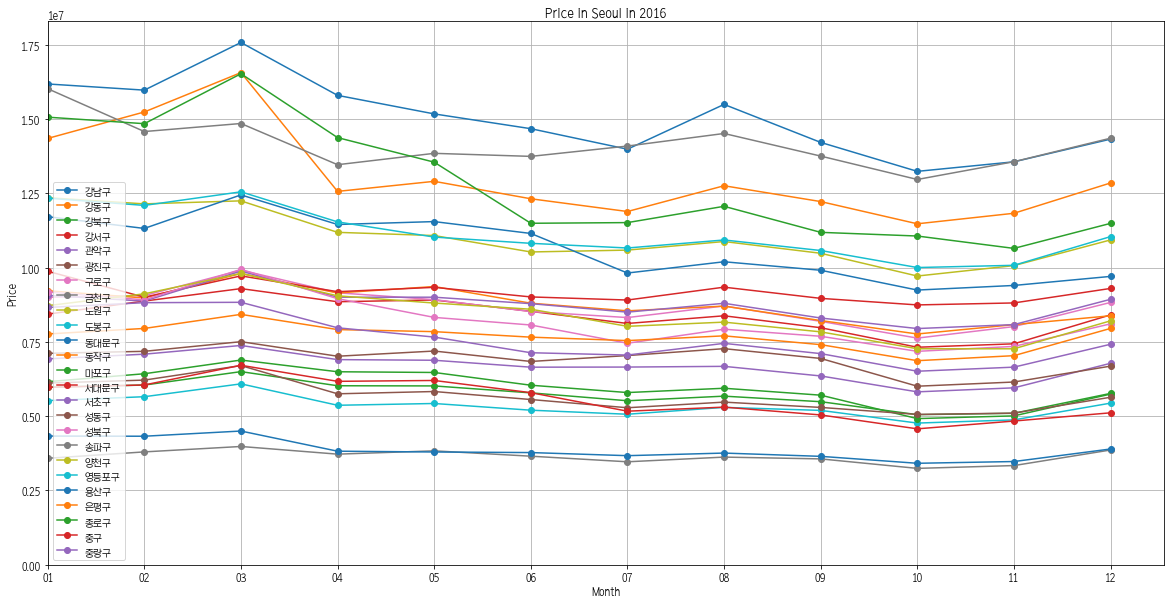

In [19]:
plt.plot(result_q[0], marker='o')
plt.axis(xmin=0, ymin=0)

plt.title('Price in Seoul in 2016')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend(result_q[0].columns.tolist(),loc='best')
plt.show()

### heatmap 그리기

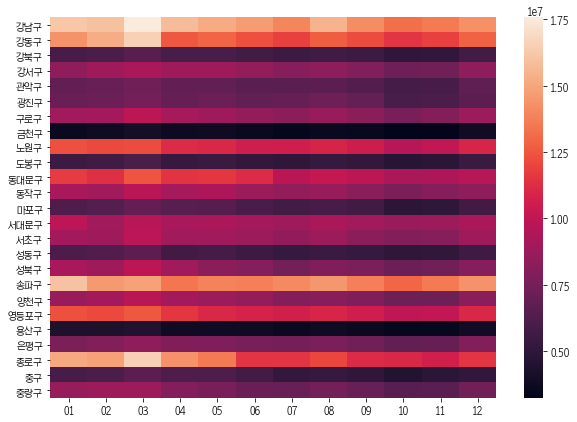

In [20]:
plt.figure(figsize = (10,7))
sns.heatmap(result_q[0].T)
plt.show()

TEST 1

In [21]:
# ID = result_q[0].T.columns.tolist()

In [22]:
from sklearn import preprocessing

x = result_q[0].T.values
drugA_anal_norm = pd.DataFrame(x, columns = month, index = result_q[0].columns)
# drugA_anal_norm = drugA_anal_norm.set_index('ID')

In [23]:
drugA_anal_norm.head()

,01,02,03,04,05,06,07,08,09,10,11,12
강남구,16177781,15970195,17573111,15794328,15170285,14672786,13982864,15490206,14211670,13237372,13558826,14321434
강동구,14345312,15235729,16559976,12563626,12901956,12314914,11886382,12753253,12220873,11473110,11827302,12847150
강북구,5975903,6047199,6499326,6024210,6018405,5784954,5519374,5674087,5487784,5051569,5097577,5766778
강서구,8433968,8873468,9292189,8850806,8910664,8527086,8120065,8377854,7976798,7319900,7434813,8408675
관악구,6928226,7086262,7379556,6903526,6881875,6649004,6652963,6676928,6353827,5818842,5954292,6780024


In [24]:
geo_path = 'seoul_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [25]:
drugA_anal_norm.index

Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object')

In [26]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

map.choropleth(geo_data = geo_str,
               data = drugA_anal_norm['01'],
               columns = [drugA_anal_norm.index, drugA_anal_norm['01']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.properties.SIG_KOR_NM')
map

In [27]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = drugA_anal_norm['02'],
               columns = [drugA_anal_norm.index, drugA_anal_norm['02']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.properties.SIG_KOR_NM')
map

TEST 2

In [28]:
from sklearn import preprocessing

x = result_q[0].T.values
min_max_scaler = preprocessing.MinMaxScaler()

In [29]:
x_scaled = min_max_scaler.fit_transform(x.astype(float))
drugA_anal_norm2 = pd.DataFrame(x_scaled, columns = month, index = result_q[0].columns)

In [30]:
drugA_anal_norm2.head()

,01,02,03,04,05,06,07,08,09,10,11,12
강남구,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.990052,1.000000,1.000000,1.000000,0.999705,0.996978
강동구,0.854510,0.939657,0.925461,0.732369,0.800582,0.786010,0.792696,0.769356,0.813046,0.823456,0.830334,0.856443
강북구,0.190018,0.184740,0.185273,0.190646,0.195419,0.193379,0.193324,0.172791,0.180746,0.180872,0.172056,0.181512
강서구,0.385177,0.416942,0.390751,0.424800,0.449690,0.442243,0.438145,0.400639,0.414487,0.407857,0.400676,0.433349
관악구,0.265628,0.270108,0.250034,0.263488,0.271330,0.271797,0.300037,0.257301,0.262075,0.257651,0.255857,0.278099


In [31]:
geo_path = 'seoul_municipalities_geo.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [32]:
# drugA_anal_norm['01']

In [33]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = drugA_anal_norm2['01'],
               columns = [drugA_anal_norm2.index, drugA_anal_norm2['01']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.properties.SIG_KOR_NM')
map

인구당 사용수량을 비교해보자

In [34]:
pop_raw = pd.read_csv("seoul_pop.csv", encoding = "utf-8")
pop_raw.head()

,기간,지역,인구,면적,인구밀도(명/㎢)
0,2017,합계,"10,124,579",605.24,"16,728"
1,2017,종로구,"164,257",23.91,"6,869"
2,2017,중구,"134,593",9.96,"13,514"
3,2017,용산구,"244,444",21.87,"11,179"
4,2017,성동구,"312,711",16.86,"18,551"


In [35]:
pop = pop_raw['인구']
pop.index = pop_raw['지역']

pop = pop.drop('합계')

# ,로 인해 str으로 인식되는 데이터를 int로 변환
pop.replace(regex=True,inplace=True,to_replace=r'[^가-힣A-Za-z0-9]',value=r'')
pop = pop.apply(pd.to_numeric, errors='ignore')

# 구 이름 순으로 sorting
pop = pop.sort_index(axis=0)

In [36]:
pop.head()

지역
강남구    561052
강동구    440359
강북구    328002
강서구    608255
관악구    520929
Name: 인구, dtype: int64

In [39]:
drugA_anal_norm.head()

,01,02,03,04,05,06,07,08,09,10,11,12
강남구,16177781,15970195,17573111,15794328,15170285,14672786,13982864,15490206,14211670,13237372,13558826,14321434
강동구,14345312,15235729,16559976,12563626,12901956,12314914,11886382,12753253,12220873,11473110,11827302,12847150
강북구,5975903,6047199,6499326,6024210,6018405,5784954,5519374,5674087,5487784,5051569,5097577,5766778
강서구,8433968,8873468,9292189,8850806,8910664,8527086,8120065,8377854,7976798,7319900,7434813,8408675
관악구,6928226,7086262,7379556,6903526,6881875,6649004,6652963,6676928,6353827,5818842,5954292,6780024


In [40]:
perpop = drugA_anal_norm['01'] / pop
perpop.head()

강남구    28.834727
강동구    32.576402
강북구    18.219105
강서구    13.865842
관악구    13.299751
dtype: float64

In [38]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

map.choropleth(geo_data = geo_str,
               data = perpop,
               columns = [perpop.index, perpop],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.properties.SIG_KOR_NM')
map